## Prueba Pratica de Simulación

In [75]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [76]:
url = 'https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/vacunas.csv'

df = pd.read_csv(url)
df.head()
df['index'] = df.index
df.head()


,fecha,dosis_total,primera_dosis,segunda_dosis,index
0,21/01/2021,0,0,0,0
1,22/01/2021,108,108,0,1
2,27/01/2021,2982,2982,0,2
3,04/02/2021,6228,6228,0,3
4,17/02/2021,8190,6228,1962,4


In [77]:
filt = df[df['fecha'].isin(["04/05/2021"])]
filt


,fecha,dosis_total,primera_dosis,segunda_dosis,index
45,04/05/2021,1141262,889218,252044,45


<AxesSubplot:xlabel='fecha'>

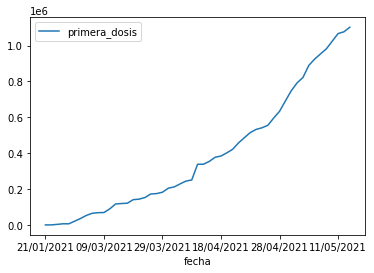

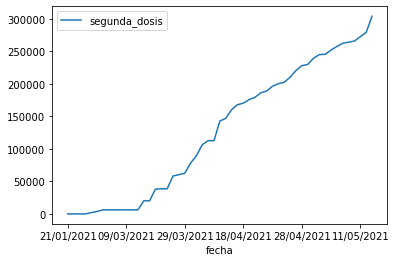

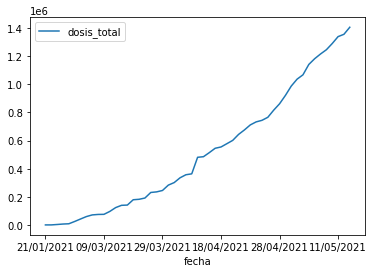

In [78]:
df.plot(x ='fecha', y='primera_dosis') 
df.plot(x ='fecha', y='segunda_dosis')
df.plot(x ='fecha', y='dosis_total')

In [79]:
url_fab = 'https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/fabricantes.csv'

df_fab = pd.read_csv(url_fab)
df_fab

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,20/01/2021
1,Pfizer/BioNTech,16380,17/02/2021
2,Pfizer/BioNTech,17550,24/02/2021
3,Pfizer/BioNTech,31590,03/03/2021
4,Sinovac,20000,06/03/2021
5,Pfizer/BioNTech,73710,10/03/2021
6,Oxford/AstraZeneca,84000,17/03/2021
7,Pfizer/BioNTech,62010,17/03/2021
8,Pfizer/BioNTech,65520,24/03/2021
9,Pfizer/BioNTech,66690,31/03/2021


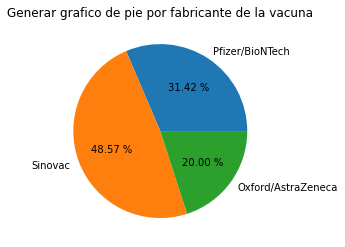

In [80]:
pfizer = df_fab[df_fab['vaccine'].isin(['Pfizer/BioNTech'])]
sinovac = df_fab[df_fab['vaccine'].isin(['Sinovac'])]
oxford = df_fab[df_fab["vaccine"].isin(['Oxford/AstraZeneca'])]

ptotal = pfizer["total"]
pdatos = pfizer["arrived_at"]
stotal = sinovac["total"]
sdatos = sinovac["arrived_at"]
ototal = oxford["total"]
odatos = oxford["arrived_at"]

psum = ptotal.values.sum()
ssum = stotal.values.sum()
osum = ototal.values.sum()

datos = [psum,ssum, osum]
facts = ['Pfizer/BioNTech','Sinovac','Oxford/AstraZeneca']
plt.pie(datos, labels=facts, autopct="%0.2f %%")
plt.title("Generar grafico de pie por fabricante de la vacuna")
plt.show()

Histograma de vacunas por mes de llegada y fabricante


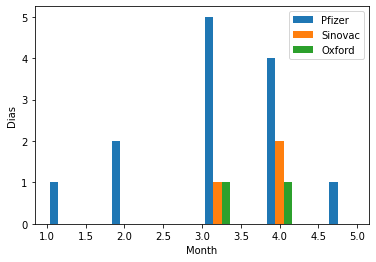

In [82]:
print("Histograma de vacunas por mes de llegada y fabricante")
month= df_fab['arrived_at']
me = []
for m in month:
    mes = m.split("/")
    me.append(int(mes[1]))
df_fab["month"]=me

pfi = df_fab[df_fab['vaccine'].isin(['Pfizer/BioNTech'])]
pfi = pfi.loc[:,['total','month']]
sin = df_fab[df_fab['vaccine'].isin(['Sinovac'])]
sin = sin.loc[:,['total', 'month']]
oxf = df_fab[df_fab['vaccine'].isin(['Oxford/AstraZeneca'])]
oxf = oxf.loc[:,['total', 'month']]

plt.xlabel("Month")
plt.ylabel("Dias")
plt.hist([pfi["month"], sin["month"],oxf['month']], label=['Pfizer','Sinovac','Oxford'])
plt.legend(loc="best")
plt.show()

In [83]:
#simulacion
#REGRESION LINEAL
df_dos = df

month= df['fecha']
me = []
for m in month:
    mes = m.split("/")
    me.append(int(mes[1]))
df_dos["total"] = df["dosis_total"]
df_dos["mes"] = me
del df_dos["dosis_total"]
df_dos.head()

,fecha,primera_dosis,segunda_dosis,index,total,mes
0,21/01/2021,0,0,0,0,1
1,22/01/2021,108,0,1,108,1
2,27/01/2021,2982,0,2,2982,1
3,04/02/2021,6228,0,3,6228,2
4,17/02/2021,6228,1962,4,8190,2


In [86]:
x = list(df.iloc[:,5])
y = list(df.iloc[:,4])
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1,1),y)

print('Coeficientes: ', regr.coef_)
print('Termino Independiente: ', regr.intercept_)#valor donde corta el eje Y -> X=0


Coeficientes:  [363963.32219251]
Termino Independiente:  -796559.6577540108


In [99]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
n = 55
y_prediccion = regr.predict([[n]])
pred = int(y_prediccion)
if pred >= 17268000:
    print(' Problación 17 268 000',' numero de vacunar',pred)
    print(' Vacunación completa en Años: ',round(n/12,2)," Años \n Vacunación completa en Meses:",n,'meses')
else:
    print('vacunados ',pred)

 Problación 17 268 000  numero de vacunar 19221423
 Vacunación completa en Años:  4.58  Años 
 Vacunación completa en Meses: 55 meses


meses [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54]


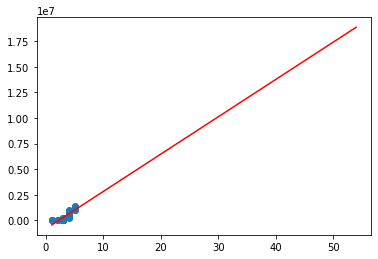

In [105]:
#Grafica
plt.scatter(x, y)
x_real = np.array(range(1, 55))
print('meses', x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='red')
plt.show()

[  -5504.71303406  166362.73679778 -523408.97574124  378539.70845193]
[[ 1.89190585e+08 -1.78098314e+09  4.99091069e+09 -3.84064974e+09]
 [-1.78098314e+09  1.69712194e+10 -4.83149453e+10  3.80632142e+10]
 [ 4.99091069e+09 -4.83149453e+10  1.40686289e+11 -1.15110236e+11]
 [-3.84064974e+09  3.80632142e+10 -1.15110236e+11  1.01273065e+11]]


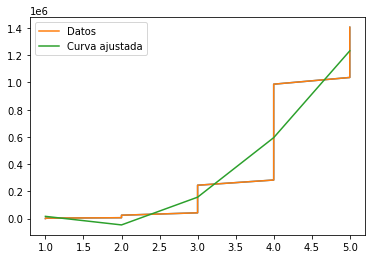

In [106]:
#Modelo exponencial

from scipy.optimize import curve_fit
x = np.array(df["mes"])
y = np.array(df["total"])
#y[0]=1

def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

res1 , res2 = curve_fit(func,x,y)
print(res1)
print(res2)

#Grafica
plt.plot(x,y)
plt.plot(x,y, label="Datos")

plt.plot(x, func(x, *res1), label="Curva ajustada")

plt.legend(loc='upper left')
plt.show()

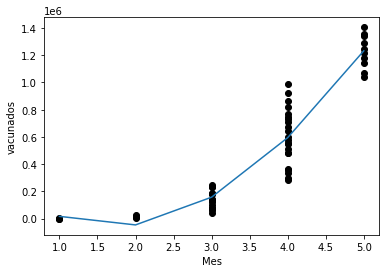

In [107]:
#Modelo polinomico

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = x.reshape(-1,1)
y = y.reshape(-1,1)

model = LinearRegression()
pre_proces = PolynomialFeatures(degree=3)

x_polin = pre_proces.fit_transform(x)

pr_model = LinearRegression()
pr_model.fit(x_polin,y)
y_pred = pr_model.predict(x_polin)

plt.scatter(x,y,c="black")
plt.xlabel("Mes")
plt.ylabel("vacunados")
plt.plot(x,y_pred)

In [108]:
#Datos de vacunación en Estados Unidos

url_eu = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/Vacunacion/WORK_ARCHIVO_1.csv'
df_eu = pd.read_csv(url_eu,sep=";",encoding="latin-1")
month= df_eu['FECHA_INMUNIZACION']
me = []
for m in month:
    mes = m.split("/")
    me.append(int(mes[1]))
df_eu["mes"]=me

tot = np.array(df_eu["SUM_of_SUM_of_1aDOSIS"])+np.array(df_eu['SUM_of_SUM_of_2aDOSIS'])
df_eu["total"]=tot
df_eu


,REGION_CORTO,COD_COMUNA_FINAL,FECHA_INMUNIZACION,SUM_of_SUM_of_1aDOSIS,SUM_of_SUM_of_2aDOSIS,mes,total
0,Metropolitana Santiago,13101,24/12/2020,280.0,NaN,12,NaN
1,Metropolitana Santiago,13108,24/12/2020,70.0,NaN,12,NaN
2,Metropolitana Santiago,13123,24/12/2020,70.0,NaN,12,NaN
3,Bíobío,8101,25/12/2020,406.0,NaN,12,NaN
4,Bíobío,8107,25/12/2020,45.0,NaN,12,NaN
...,...,...,...,...,...,...,...
27689,Ñuble,16301,13/05/2021,179.0,124.0,5,303.0
27690,Ñuble,16302,13/05/2021,137.0,74.0,5,211.0
27691,Ñuble,16303,13/05/2021,3.0,7.0,5,10.0
27692,Ñuble,16304,13/05/2021,20.0,12.0,5,32.0


<AxesSubplot:xlabel='mes'>

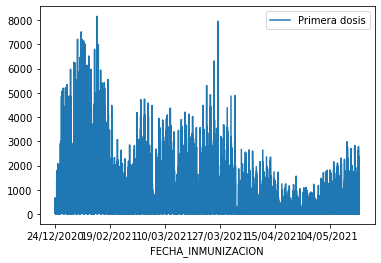

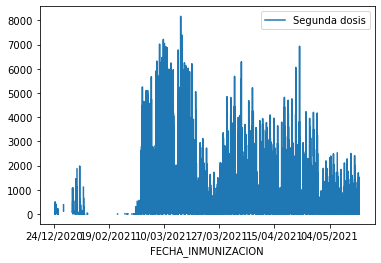

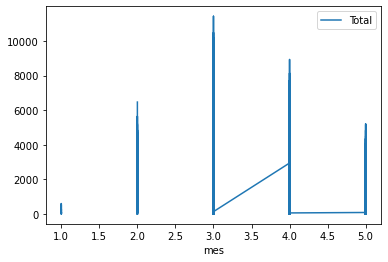

In [110]:
df_eu.plot(x="FECHA_INMUNIZACION", y ="SUM_of_SUM_of_1aDOSIS", label="Primera dosis")
df_eu.plot(x='FECHA_INMUNIZACION', y="SUM_of_SUM_of_2aDOSIS", label="Segunda dosis")
df_eu.plot(x="mes", y ="total", label="Total")

COMPARACION EEUU VS ECUADOR


<AxesSubplot:xlabel='FECHA_INMUNIZACION'>

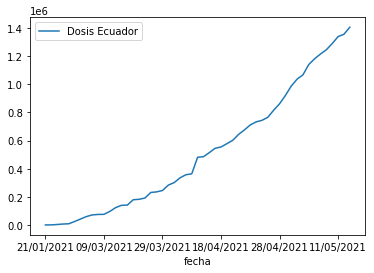

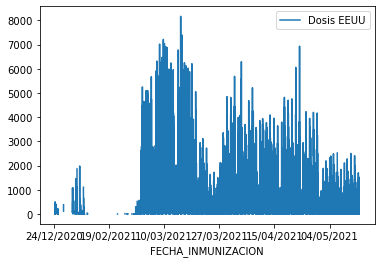

In [111]:
print('COMPARACION EEUU VS ECUADOR')

#Ecuador
df.plot(x='fecha', y ="total", label="Dosis Ecuador")

#Estados Unidos

df_eu.plot(x='FECHA_INMUNIZACION', y="SUM_of_SUM_of_2aDOSIS", label="Dosis EEUU")
